In [55]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [56]:
#TRAIN DATA 匯入
a = pd.read_csv("./train.csv", index_col = 0)
b = pd.read_csv("./test.csv", index_col = 0)

y=a.pop('class')
print('train shape : ', a.shape)
print('test shape : ', b.shape)

train shape :  (108800, 9)
test shape :  (27200, 9)


In [57]:
dfAllData=pd.concat([a,b],ignore_index=False)
print('all data shape : ', dfAllData.shape)

all data shape :  (136000, 9)


In [58]:
cols=list(dfAllData.columns)
dfAllData.head(10)

device_id  age  sex  browser  source         country  \
user_id                                                                   
6b5aecb444b26  7a543b4bf3647   33    0   Safari     Ads   United States   
f00edc3db68f0  c35ab03e7ff0f   26    1   Chrome  Direct  European Union   
6f144a20b2e41  31a274c4b1d58   28    0   Chrome  Direct   United States   
21db12c470157  74e7d74dbd61d   50    0  FireFox     Ads   United States   
af1753dfd703c  b5f31ea91ae62   27    1       IE     SEO   United States   
56ab6189b8cd6  43f6244c9dd95   24    1  FireFox     SEO   United States   
7b8162369fc4f  97701c792782a   38    0  FireFox     Ads             NaN   
8ffc72bf16576  c1ff42cc0d6d1   35    1       IE     SEO         Germany   
095deac2caeeb  8164501b765d6   40    1       IE  Direct           Japan   
09e14f866e623  7a873269f85a9   30    1   Chrome     Ads   United States   

               purchase_value          signup_time        purchase_time  
user_id                                                                  
6b5aecb444b26              48  2018-05-27 12:02:29  2018-08-19 14:09:55  
f00edc3db68f0              50  2018-06-06 08:09:12  2018-09-09 01:26:43  
6f144a20b2e41              31  2018-03-29 18:24:17  2018-06-13 04:56:21  
21db12c470157              31  2018-06-18 02:49:33  2018-06-29 23:31:45  
af1753dfd703c              16  2018-01-31 18:26:38  2018-02-13 16:36:51  
56ab6189b8cd6              86  2018-01-24 17:31:45  2018-05-05 23:54:07  
7b8162369fc4f              28  2018-07-29 10:11:40  2018-10-13 11:28:04  
8ffc72bf16576              21  2018-06-03 13:41:50  2018-08-11 06:37:01  
095deac2caeeb              48  2018-06-16 13:08:48  2018-08-16 09:46:35  
09e14f866e623              52  2018-06-28 06:37:51  2018-07-10 19:13:08

In [59]:
dfAllData.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 136000 entries, 6b5aecb444b26 to 54936d27a47a7
Columns: 9 entries, device_id to purchase_time
dtypes: int64(3), object(6)
memory usage: 10.4+ MB


In [60]:
a_na = dfAllData[:].isnull().mean().sort_values(axis=0,ascending=False)
print(a_na)

country           0.145338
purchase_time     0.000000
signup_time       0.000000
purchase_value    0.000000
source            0.000000
browser           0.000000
sex               0.000000
age               0.000000
device_id         0.000000
dtype: float64


In [61]:
cols = list(set(dfAllData.columns.values[dfAllData.isnull().any()]))
dfAllData[cols].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 136000 entries, 6b5aecb444b26 to 54936d27a47a7
Columns: 1 entries, country to country
dtypes: object(1)
memory usage: 2.1+ MB


In [62]:
num_cols = dfAllData[cols].select_dtypes(exclude='object').columns.values
cat_cols = dfAllData[cols].select_dtypes(include='object').columns.values

In [63]:
dfAllData[cols].describe(include=['O'])

country
count          116234
unique            180
top     United States
freq            52206

In [64]:
a_mode = dfAllData[cat_cols].describe(exclude=[np.number])
print(a_mode)
print('=============')
a_mode = a_mode.loc[['top','freq'],:]
print(a_mode)
print('=============')
a_mode = a_mode.loc[['top','freq'],:].transpose()
print(a_mode)
a_mode1 = a_mode[:].index.values
print('=============')
print(a_mode1)

              country
count          116234
unique            180
top     United States
freq            52206
            country
top   United States
freq          52206
                   top   freq
country  United States  52206
['country']


In [65]:
a_mode_dict = a_mode[a_mode.freq > 1000]['top']
print(a_mode_dict)

country    United States
Name: top, dtype: object


In [66]:
a_mode = dfAllData[cat_cols].describe(exclude=[np.number])
a_mode = a_mode.loc[['top','freq'],:].transpose()
a_mode_dict = a_mode[a_mode.freq > 1000]['top'].to_dict()

a_mode_dict

{'country': 'United States'}

In [67]:
dfAllData.fillna(value=a_mode_dict, inplace=True)

In [68]:
print('All data set cols have missing values: ', sum(dfAllData.isnull().any()))
#print('Testing set cols have missing values: ', sum(dfTestData.isnull().any()))

All data set cols have missing values:  0


In [69]:
import calendar
from datetime import datetime
dfAllData["P_date"] = dfAllData.purchase_time.apply(lambda x : x.split()[0])
dfAllData["P_month"] = dfAllData.P_date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dfAllData["P_weekday"] = dfAllData.P_date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dfAllData["P_day"] = dfAllData.P_date.apply(lambda x : x.split("-")[2])
dfAllData["P_hour"] = dfAllData.purchase_time.apply(lambda x : x.split()[1].split(":")[0])
dfAllData

device_id  age  sex  browser  source         country  \
user_id                                                                   
6b5aecb444b26  7a543b4bf3647   33    0   Safari     Ads   United States   
f00edc3db68f0  c35ab03e7ff0f   26    1   Chrome  Direct  European Union   
6f144a20b2e41  31a274c4b1d58   28    0   Chrome  Direct   United States   
21db12c470157  74e7d74dbd61d   50    0  FireFox     Ads   United States   
af1753dfd703c  b5f31ea91ae62   27    1       IE     SEO   United States   
...                      ...  ...  ...      ...     ...             ...   
cd16362b71572  2515db9e4437e   29    1       IE     SEO   United States   
132fb9f609701  58511ac9e2ebb   42    0   Safari     Ads          France   
4c6d7c325963f  8964657427d3d   41    1   Chrome     Ads   United States   
61daa6f70df29  df795a2402c3f   36    1       IE     Ads         Romania   
54936d27a47a7  1f91e2413d763   24    0   Chrome  Direct   United States   

               purchase_value          signup_time        purchase_time  \
user_id                                                                   
6b5aecb444b26              48  2018-05-27 12:02:29  2018-08-19 14:09:55   
f00edc3db68f0              50  2018-06-06 08:09:12  2018-09-09 01:26:43   
6f144a20b2e41              31  2018-03-29 18:24:17  2018-06-13 04:56:21   
21db12c470157              31  2018-06-18 02:49:33  2018-06-29 23:31:45   
af1753dfd703c              16  2018-01-31 18:26:38  2018-02-13 16:36:51   
...                       ...                  ...                  ...   
cd16362b71572              48  2018-03-08 05:02:33  2018-05-05 23:04:43   
132fb9f609701              12  2018-05-15 23:23:29  2018-05-19 06:35:14   
4c6d7c325963f              26  2018-06-08 15:39:11  2018-06-13 17:24:44   
61daa6f70df29              17  2018-06-25 12:47:27  2018-08-27 19:17:54   
54936d27a47a7              48  2018-01-20 17:55:53  2018-01-22 00:55:54   

                   P_date    P_month  P_weekday P_day P_hour  
user_id                                                       
6b5aecb444b26  2018-08-19     August     Sunday    19     14  
f00edc3db68f0  2018-09-09  September     Sunday    09     01  
6f144a20b2e41  2018-06-13       June  Wednesday    13     04  
21db12c470157  2018-06-29       June     Friday    29     23  
af1753dfd703c  2018-02-13   February    Tuesday    13     16  
...                   ...        ...        ...   ...    ...  
cd16362b71572  2018-05-05        May   Saturday    05     23  
132fb9f609701  2018-05-19        May   Saturday    19     06  
4c6d7c325963f  2018-06-13       June  Wednesday    13     17  
61daa6f70df29  2018-08-27     August     Monday    27     19  
54936d27a47a7  2018-01-22    January     Monday    22     00  

[136000 rows x 14 columns]

In [70]:
onlyNumAllData = dfAllData.select_dtypes(include='number')
numCols=list(onlyNumAllData.columns)
numCols

['age', 'sex', 'purchase_value']

In [71]:
onlyCatAllData = dfAllData.select_dtypes(exclude='number')
catCols=list(onlyCatAllData.columns)
catCols

['device_id',
 'browser',
 'source',
 'country',
 'signup_time',
 'purchase_time',
 'P_date',
 'P_month',
 'P_weekday',
 'P_day',
 'P_hour']

In [72]:
newX = pd.get_dummies(dfAllData[['P_date','P_month','P_weekday','P_day','P_hour','browser', 'source', 'country']])
newX.head(10)

P_date_2018-01-01  P_date_2018-01-02  P_date_2018-01-03  \
user_id                                                                  
6b5aecb444b26                  0                  0                  0   
f00edc3db68f0                  0                  0                  0   
6f144a20b2e41                  0                  0                  0   
21db12c470157                  0                  0                  0   
af1753dfd703c                  0                  0                  0   
56ab6189b8cd6                  0                  0                  0   
7b8162369fc4f                  0                  0                  0   
8ffc72bf16576                  0                  0                  0   
095deac2caeeb                  0                  0                  0   
09e14f866e623                  0                  0                  0   

               P_date_2018-01-04  P_date_2018-01-05  P_date_2018-01-06  \
user_id                                                                  
6b5aecb444b26                  0                  0                  0   
f00edc3db68f0                  0                  0                  0   
6f144a20b2e41                  0                  0                  0   
21db12c470157                  0                  0                  0   
af1753dfd703c                  0                  0                  0   
56ab6189b8cd6                  0                  0                  0   
7b8162369fc4f                  0                  0                  0   
8ffc72bf16576                  0                  0                  0   
095deac2caeeb                  0                  0                  0   
09e14f866e623                  0                  0                  0   

               P_date_2018-01-07  P_date_2018-01-08  P_date_2018-01-09  \
user_id                                                                  
6b5aecb444b26                  0                  0                  0   
f00edc3db68f0                  0                  0                  0   
6f144a20b2e41                  0                  0                  0   
21db12c470157                  0                  0                  0   
af1753dfd703c                  0                  0                  0   
56ab6189b8cd6                  0                  0                  0   
7b8162369fc4f                  0                  0                  0   
8ffc72bf16576                  0                  0                  0   
095deac2caeeb                  0                  0                  0   
09e14f866e623                  0                  0                  0   

               P_date_2018-01-10  ...  country_United States  country_Uruguay  \
user_id                           ...                                           
6b5aecb444b26                  0  ...                      1                0   
f00edc3db68f0                  0  ...                      0                0   
6f144a20b2e41                  0  ...                      1                0   
21db12c470157                  0  ...                      1                0   
af1753dfd703c                  0  ...                      1                0   
56ab6189b8cd6                  0  ...                      1                0   
7b8162369fc4f                  0  ...                      1                0   
8ffc72bf16576                  0  ...                      0                0   
095deac2caeeb                  0  ...                      0                0   
09e14f866e623                  0  ...                      1                0   

               country_Uzbekistan  country_Vanuatu  country_Venezuela  \
user_id                                                                 
6b5aecb444b26                   0                0                  0   
f00edc3db68f0                   0                0                  0   
6f144a20b2e41                   0                0                  0   
21db12c470

In [73]:
onlyNumAllData.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 136000 entries, 6b5aecb444b26 to 54936d27a47a7
Columns: 3 entries, age to purchase_value
dtypes: int64(3)
memory usage: 4.2+ MB


In [74]:
onlyNumAllData = dfAllData.select_dtypes(include='number')

left = onlyNumAllData
right = newX
result = pd.merge(left, right, how='inner', on=['user_id'])
result


result.head(10)

age  sex  purchase_value  P_date_2018-01-01  P_date_2018-01-02  \
user_id                                                                         
6b5aecb444b26   33    0              48                  0                  0   
f00edc3db68f0   26    1              50                  0                  0   
6f144a20b2e41   28    0              31                  0                  0   
21db12c470157   50    0              31                  0                  0   
af1753dfd703c   27    1              16                  0                  0   
56ab6189b8cd6   24    1              86                  0                  0   
7b8162369fc4f   38    0              28                  0                  0   
8ffc72bf16576   35    1              21                  0                  0   
095deac2caeeb   40    1              48                  0                  0   
09e14f866e623   30    1              52                  0                  0   

               P_date_2018-01-03  P_date_2018-01-04  P_date_2018-01-05  \
user_id                                                                  
6b5aecb444b26                  0                  0                  0   
f00edc3db68f0                  0                  0                  0   
6f144a20b2e41                  0                  0                  0   
21db12c470157                  0                  0                  0   
af1753dfd703c                  0                  0                  0   
56ab6189b8cd6                  0                  0                  0   
7b8162369fc4f                  0                  0                  0   
8ffc72bf16576                  0                  0                  0   
095deac2caeeb                  0                  0                  0   
09e14f866e623                  0                  0                  0   

               P_date_2018-01-06  P_date_2018-01-07  ...  \
user_id                                              ...   
6b5aecb444b26                  0                  0  ...   
f00edc3db68f0                  0                  0  ...   
6f144a20b2e41                  0                  0  ...   
21db12c470157                  0                  0  ...   
af1753dfd703c                  0                  0  ...   
56ab6189b8cd6                  0                  0  ...   
7b8162369fc4f                  0                  0  ...   
8ffc72bf16576                  0                  0  ...   
095deac2caeeb                  0                  0  ...   
09e14f866e623                  0                  0  ...   

               country_United States  country_Uruguay  country_Uzbekistan  \
user_id                                                                     
6b5aecb444b26                      1                0                   0   
f00edc3db68f0                      0                0                   0   
6f144a20b2e41                      1                0                   0   
21db12c470157                      1                0                   0   
af1753dfd703c                      1                0                   0   
56ab6189b8cd6                      1                0                   0   
7b8162369fc4f                      1                0                   0   
8ffc72bf16576                      0                0                   0   
095deac2caeeb                      0                0                   0   
09e14f866e623                      1                0                   0   

               country_Vanuatu  country_Venezuela  country_Viet Nam  \
user_id                                                               
6b5aecb444b26                0                  0                 0   
f00edc3db68f0                0                  0                 0   
6f144a20b2e41                0                  0                 0   
21db12c470157                0                  0                 0   
af1753dfd703c                0                  0                 0   
56ab6189b8

In [75]:
print('all data shape : ', result.shape)

all data shape :  (136000, 615)


In [76]:
dfTrainData=result[:108800]
dfTestData=result[108800:]
print('Train data shape : ', dfTrainData.shape)
print('Test data shape : ', dfTestData.shape)

Train data shape :  (108800, 615)
Test data shape :  (27200, 615)


In [77]:
# 做 One-hot encoding
#y = result['class']
y.values[0:10]
y = keras.utils.to_categorical(y)
y[0:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [78]:
def build_model(X):
    #tf.random.set_seed(13)  # 固定隨機產生的數字序列

    model = keras.Sequential()

    model.add(layers.Dense(198, input_dim=X.shape[1],kernel_regularizer=keras.regularizers.l2(l=0.0033)))
    lrelu = layers.LeakyReLU(alpha=0.1)
    model.add(lrelu)
    
    model.add(layers.Dropout(0.1))

    model.add(layers.Dense(66))
    lrelu = layers.LeakyReLU(alpha=0.1)
    model.add(lrelu)
    
    model.add(layers.Dense(2))
    model.add(layers.Activation('softmax'))

    return model

In [84]:
#X_ = result.iloc[:, :-1]
#X_ = result.drop(['class'], axis=1)
X = dfTrainData.values 

from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

model = build_model(X_scaled)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 198)               121968    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 198)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 198)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 66)                13134     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 66)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 134       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
n_patience = 3  # 訓練過程經過 n_patience 次沒有進步之後停止
early_stopping = EarlyStopping(monitor='val_loss',   # 是否進步的指標
                               patience=n_patience,
                               verbose=1)

In [86]:
# 編譯模型用以訓練 (設定 optimizer, loss function, metrics, 等等)
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adagrad(learning_rate=0.002),
              metrics=['acc'])

#learning_rate=0.003

In [87]:
batch_size = 1000
epochs = 150

In [88]:
model_history \
    = model.fit(X_scaled, y,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                shuffle=True,
                validation_split=0.1,
               callbacks=[early_stopping])

Train on 97920 samples, validate on 10880 samples
Epoch 1/150
97920/97920 [==============================] - 2s 16us/sample - loss: 1.5304 - acc: 0.8386 - val_loss: 1.4081 - val_acc: 0.9100
Epoch 2/150
97920/97920 [==============================] - 0s 5us/sample - loss: 1.3553 - acc: 0.9065 - val_loss: 1.3101 - val_acc: 0.9100
Epoch 3/150
97920/97920 [==============================] - 0s 5us/sample - loss: 1.2943 - acc: 0.9065 - val_loss: 1.2726 - val_acc: 0.9100
Epoch 4/150
97920/97920 [==============================] - 0s 5us/sample - loss: 1.2684 - acc: 0.9065 - val_loss: 1.2533 - val_acc: 0.9100
Epoch 5/150
97920/97920 [==============================] - 0s 4us/sample - loss: 1.2523 - acc: 0.9065 - val_loss: 1.2391 - val_acc: 0.9100
Epoch 6/150
97920/97920 [==============================] - 0s 4us/sample - loss: 1.2393 - acc: 0.9065 - val_loss: 1.2264 - val_acc: 0.9100
Epoch 7/150
97920/97920 [==============================] - 0s 4us/sample - loss: 1.2269 - acc: 0.9065 - val_loss: 1

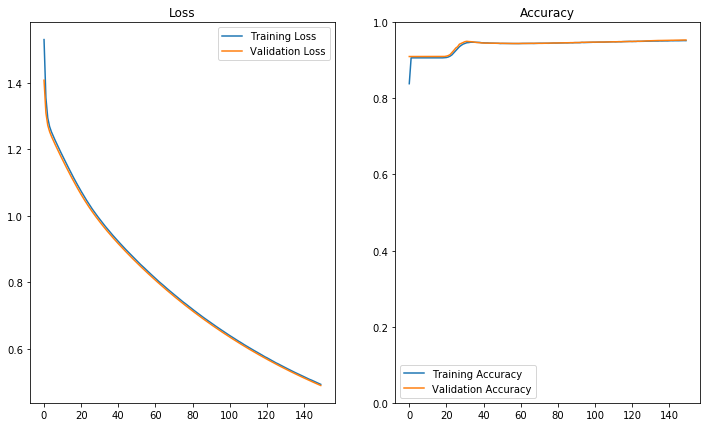

In [89]:
# 視覺化訓練過程
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

plt.figure(figsize=(12, 7))

# 繪製 Training loss 和 Validation loss
plt.subplot(121)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Loss')

# 繪製 Training accuracy 和 Validation accuracy
plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.ylim((0, 1))
plt.legend(loc='best')
plt.title('Accuracy')

plt.show()

In [90]:
testX_ = dfTestData.iloc[:, :]
testX = testX_.values 

In [91]:
y_scaled = scaler.fit_transform(testX)
y_pred = model.predict(y_scaled)

In [92]:
print(y_pred[:10,:]) # 預測出來各個類別的機率值

[[0.970123   0.02987695]
 [0.9614367  0.03856327]
 [0.9592397  0.04076024]
 [0.96175945 0.03824062]
 [0.96118593 0.0388141 ]
 [0.9607281  0.0392719 ]
 [0.93737465 0.06262536]
 [0.9718416  0.02815844]
 [0.15557364 0.84442633]
 [0.93901986 0.0609802 ]]


In [93]:
y_label = np.argmax(y_pred, axis=1) # 取機率值最高的類別當作預測結果
print(y_label[:20])

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [94]:
testDD = pd.read_csv("./sampleSubmission.csv")
AA = testDD.iloc[:,0]
predResultHW = pd.DataFrame({'user_id':AA,'class':y_label})
predResultHW.to_csv("mid_Fraud01.csv", index = 0)